In [1]:
"""
Arjun Srivastava
arj1
AMATH 301 B
"""

import numpy as np
import scipy.linalg
import scipy.optimize
import matplotlib.pyplot as plt
import scipy.interpolate

Min Error: 0.9497282235549688


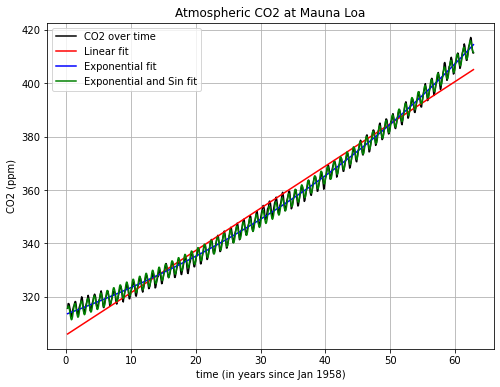

In [6]:
# Problem 1

data = np.genfromtxt('CO2_data.csv', delimiter=',')
t, co2 = data[0, :], data[1, :]
n = len(t)

# a)

coeffs = np.polyfit(t, co2, 1)

yhat = np.polyval(coeffs, t)
yhat2 = lambda arb : arb[0] * np.exp(arb[1]*t) + arb[2]

RMS_Error = lambda coeffs : np.sqrt((1 / n) * np.sum((yhat2(coeffs) - co2) ** 2))
coeff_min = scipy.optimize.minimize(RMS_Error, np.array([30, 0.03, 300]), method='Nelder-Mead')

yhat3 = lambda ARB : ARB[0] * np.exp(ARB[1]*t) + ARB[2] + ARB[3] * np.sin(ARB[4]*(t - ARB[5]))
RMS_Error2 = lambda coeffs : np.sqrt((1 / n) * np.sum((yhat3(coeffs) - co2) ** 2))
coeff_min2 = scipy.optimize.minimize(RMS_Error2, np.array([coeff_min.x[0], coeff_min.x[1], coeff_min.x[2], -5, 4, 0]), 
                                     method='Nelder-Mead', options={'maxiter': 1000})
plt.figure(figsize=(8, 6))
plt.title('Atmospheric CO2 at Mauna Loa')
plt.xlabel('time (in years since Jan 1958)')
plt.ylabel('CO2 (ppm)')
plt.grid()
plt.plot(t, co2, 'k', t, yhat, 'r', t, yhat2(coeff_min.x), 'b', t, yhat3(coeff_min2.x), 'g')
plt.legend(['CO2 over time', 'Linear fit', 'Exponential fit', 'Exponential and Sin fit'])

# b)

exp_sin_error = RMS_Error2(coeff_min2.x)
print("Min Error:", exp_sin_error)
"""
The lowest RMS error came from the 'Exponential and Sin fit' function (f(t) =ae^rt+b+Asin(B(t−C))). Although the exponential fit by
itself modeled the shape of the data quite well, the added trig function here significantly increased its accuracy, reducing the
error to a low of 0.9497282235549688. This is due to the sine wave oscillations in addition to the exponential curve. I think 
this model captures patterns in CO2 very well due to the sine wave, and it doesn't seem overfitted due to the similarity of the
real data.
"""

# c)

